In [1]:
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [8]:
import torch
import fastai
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *

In [3]:
torch.__version__

'1.13.1+cu117'

In [4]:
path = Path('dataset')
dls = ImageDataLoaders.from_folder(path=path, train="training", valid="validation", 
                                   item_tfms=RandomResizedCrop(224, min_scale=0.5),
                                   batch_tfms=aug_transforms(), device=torch.device('cuda'))

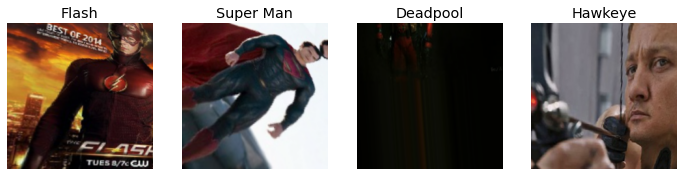

In [5]:
dls.show_batch(max_n=4, nrows=1)

In [6]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

C:\Users\Utilizador\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Utilizador\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.509632,0.539335,0.155468,15:38


epoch,train_loss,valid_loss,error_rate,time
0,0.126603,0.382043,0.094862,14:05
1,0.061821,0.303291,0.076416,14:14
2,0.027688,0.216926,0.054018,13:02
3,0.011868,0.211896,0.047431,13:19


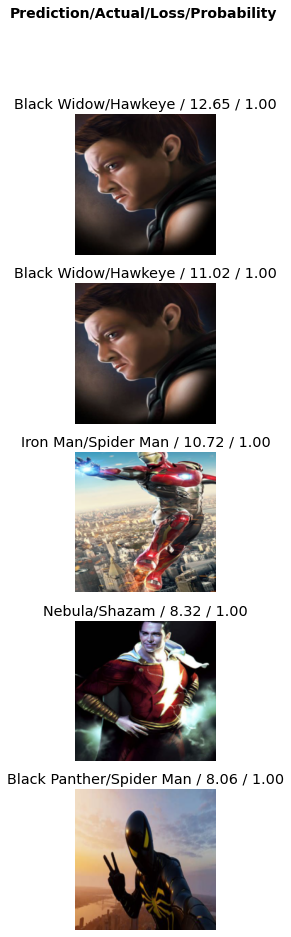

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(5, nrows=5)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,superhero in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/superhero)

In [10]:
learn.export('export.pkl')